In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency

In [3]:
HR = pd.read_csv("/Users/tosol/Documents/Data analisi/Git/Progetto_da_github/HRDataset_v14.csv")
HR.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### 1. Esiste una relazione tra il punteggio di rendimento di una persona e per chi essa lavora?

In [56]:
print("STATISTICHE PERFORMANCE PER MANAGER\n")

perf_stats = HR.groupby('ManagerName')['PerfScoreID'].agg([
    ('Media_Performance', 'mean'),
    ('Std_Performance', 'std'),
    ('Min_Performance', 'min'),
    ('Max_Performance', 'max')
]).round(2)

dip_counts = HR.groupby('ManagerName')['EmpID'].count().rename('Numero_Dipendenti')

manager_stats = pd.concat([perf_stats, dip_counts], axis=1).reset_index()
manager_stats = manager_stats.sort_values('Media_Performance', ascending=False)

print(manager_stats)

STATISTICHE PERFORMANCE PER MANAGER

           ManagerName  Media_Performance  Std_Performance  Min_Performance  \
9         Eric Dougall               3.25             0.50                3   
11     Jennifer Zamora               3.14             0.69                2   
19          Simon Roup               3.12             0.33                3   
10          Janet King               3.11             0.57                2   
0      Alex Sweetwater               3.11             0.60                2   
13       Kelley Spirea               3.09             0.43                2   
14       Ketsia Liebig               3.05             0.38                2   
3   Brandon R. LeBlanc               3.00             0.00                3   
2   Board of Directors               3.00             0.00                3   
20      Webster Butler               3.00             0.45                2   
16       Lynn Daneault               3.00             0.71                1   
6        David 

In [55]:
print("TEST ANOVA: DIFFERENZE SIGNIFICATIVE TRA MANAGER\n")

managers = HR['ManagerName'].unique()
performance_by_manager = [HR[HR['ManagerName'] == manager]['PerfScoreID'].values for manager in managers]

f_stat, p_value = stats.f_oneway(*performance_by_manager)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ RISULTATO: Esiste una differenza statisticamente significativa tra i manager (p < 0.05)")
else:
    print("❌ RISULTATO: Non esiste una differenza statisticamente significativa tra i manager (p >= 0.05)")

TEST ANOVA: DIFFERENZE SIGNIFICATIVE TRA MANAGER

F-statistic: 0.5868
P-value: 0.9208
❌ RISULTATO: Non esiste una differenza statisticamente significativa tra i manager (p >= 0.05)


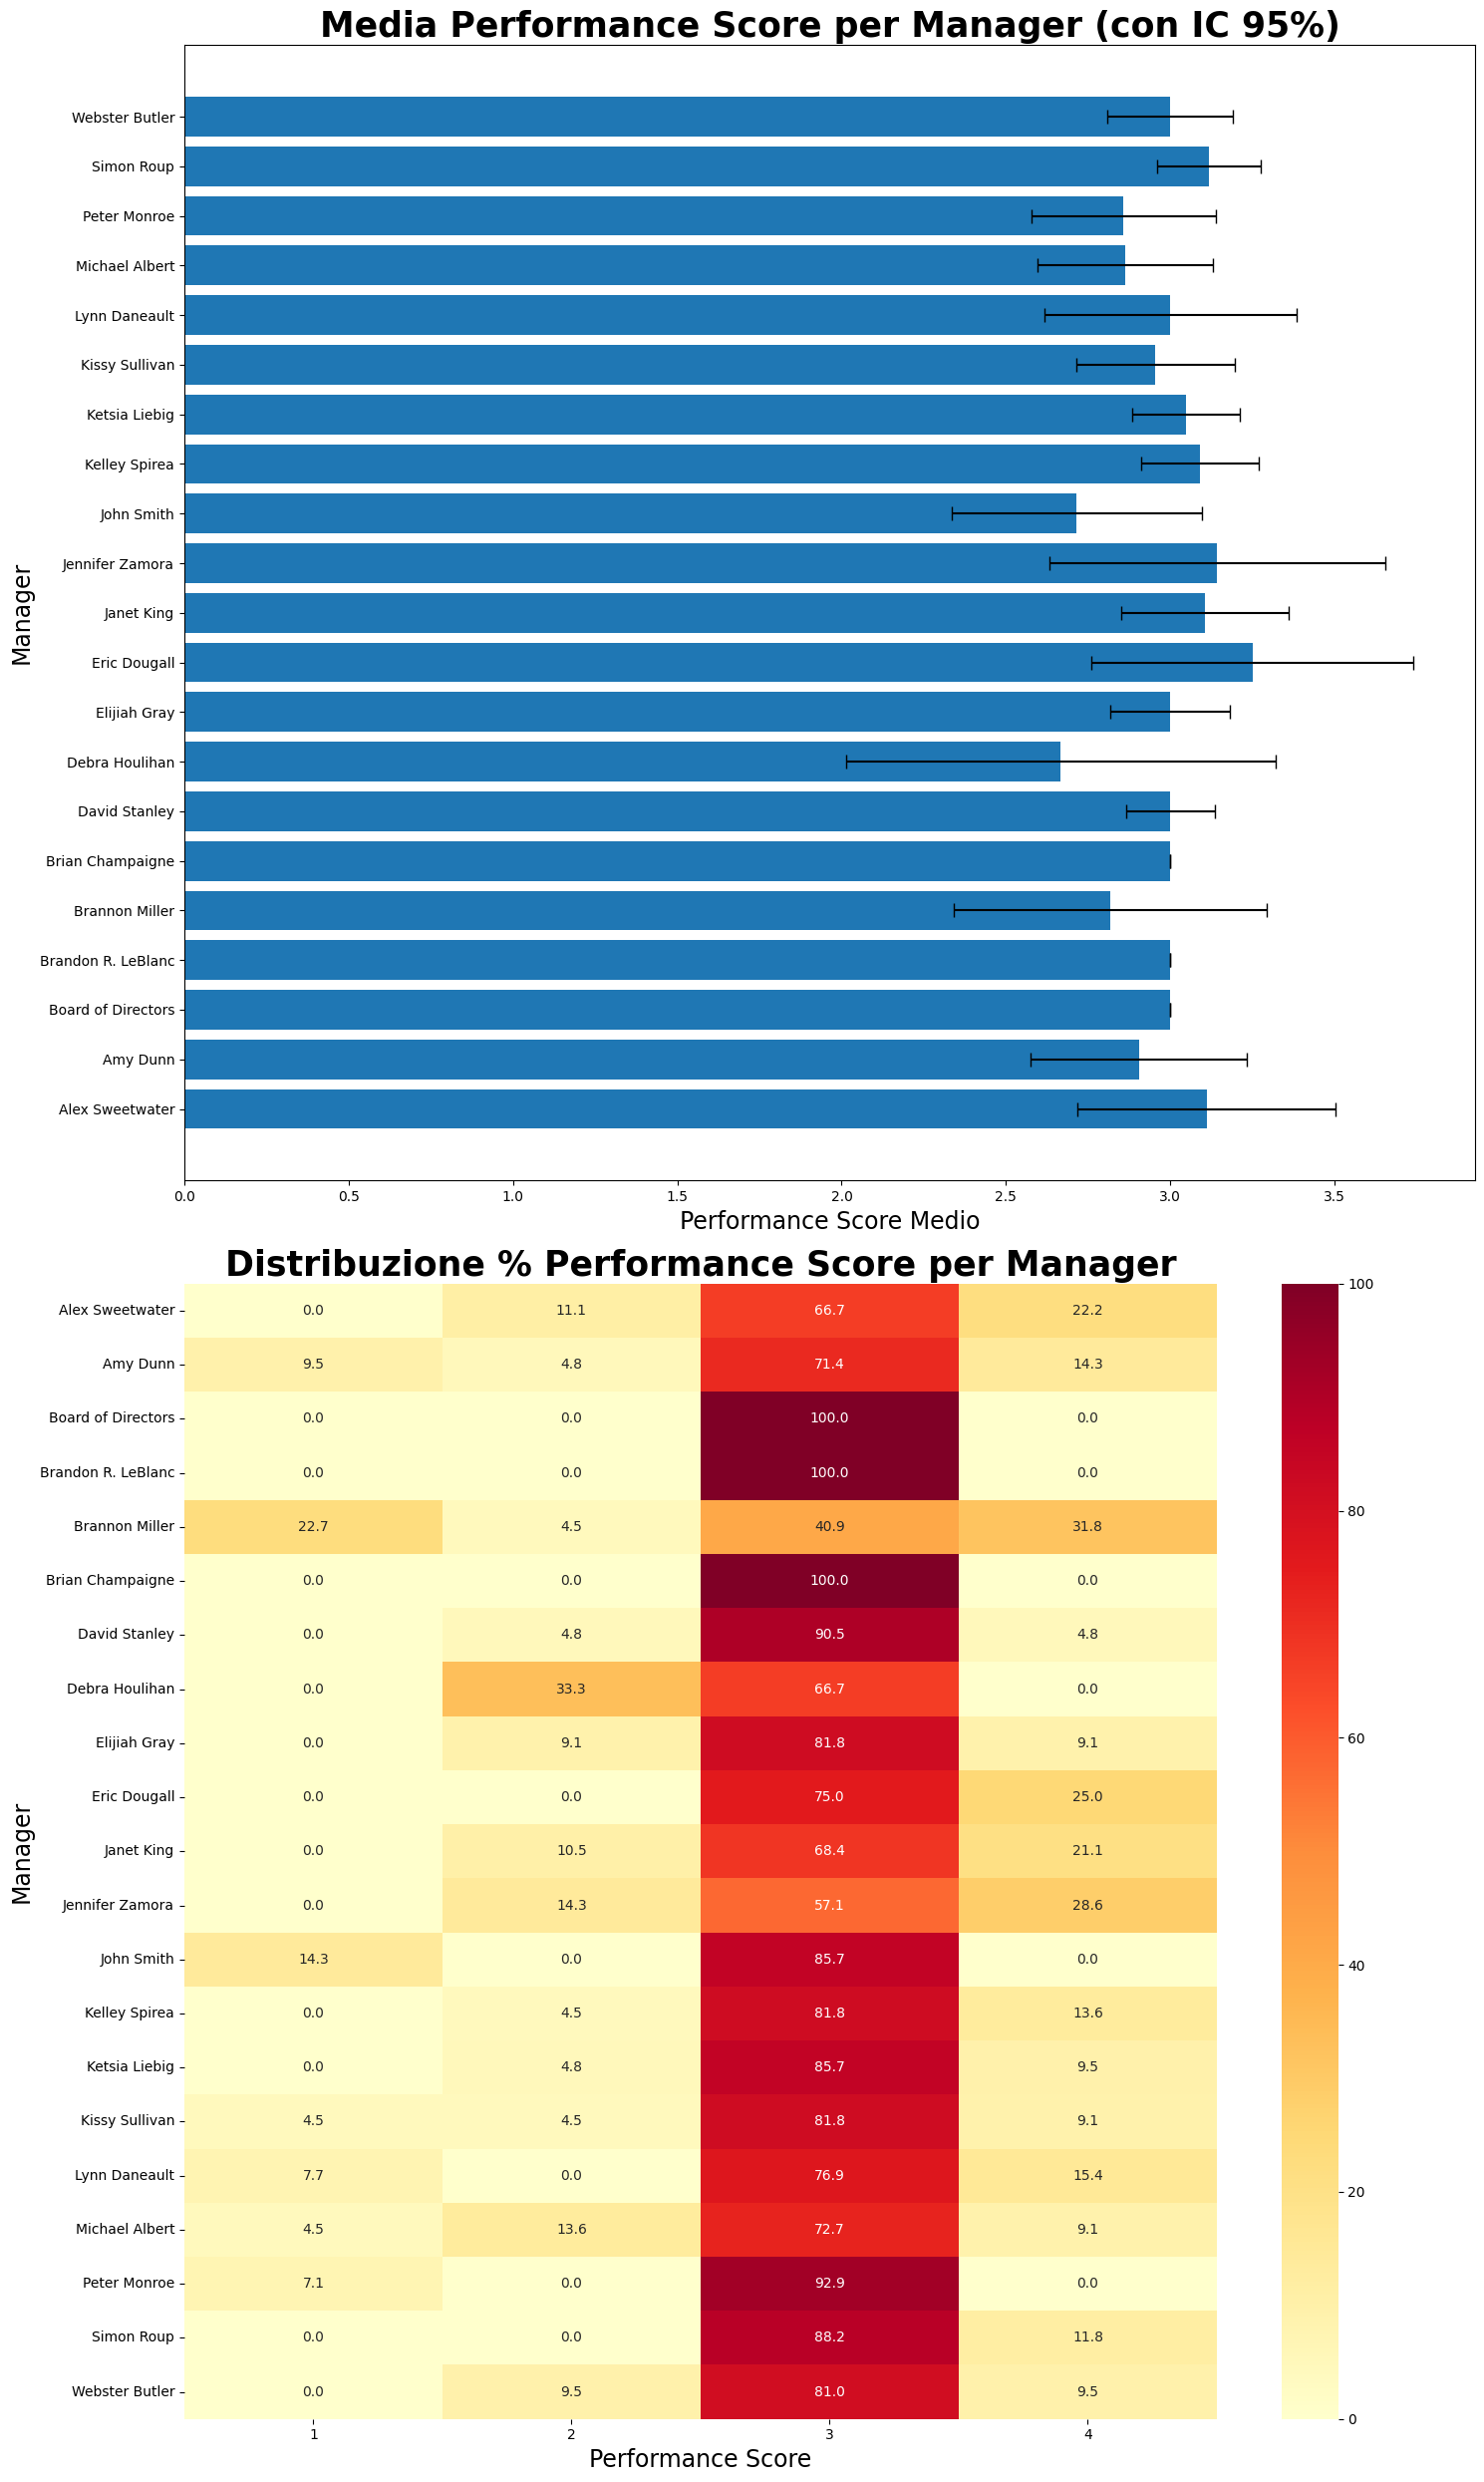

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(15, 25))

manager_means = HR.groupby('ManagerName')['PerfScoreID'].agg(['mean', 'sem']).reset_index()
manager_means.columns = ['Manager', 'Media', 'Errore_Std']

axes[0].barh(manager_means['Manager'], manager_means['Media'], 
               xerr=manager_means['Errore_Std']*1.96, capsize=5)
axes[0].set_title('Media Performance Score per Manager (con IC 95%)', fontsize=25, fontweight='bold')
axes[0].set_xlabel('Performance Score Medio', fontsize=17)
axes[0].set_ylabel('Manager', fontsize=17)

performance_crosstab = pd.crosstab(HR['ManagerName'], HR['PerfScoreID'], normalize='index') * 100
sns.heatmap(performance_crosstab, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Distribuzione % Performance Score per Manager', fontsize=25, fontweight='bold')
axes[1].set_xlabel('Performance Score', fontsize=17)
axes[1].set_ylabel('Manager', fontsize=17)

plt.tight_layout()
plt.show()


### 2. Qual è il profilo complessivo della diversità etnica dell'organizzazione? 

In [5]:
print("Distribuzione per gruppo etnico:")
race_dist = HR["RaceDesc"].value_counts()
print(race_dist)

Distribuzione per gruppo etnico:
RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64


In [6]:
print(f"\nNumero totale di gruppi etnici rappresentati: {HR['RaceDesc'].nunique()}")


Numero totale di gruppi etnici rappresentati: 6


In [7]:
print(f"\nPercentuale di dipendenti per gruppo etnico:")
race_perc = (HR["RaceDesc"].value_counts(normalize=True) * 100).round(2)
print(race_perc)


Percentuale di dipendenti per gruppo etnico:
RaceDesc
White                               60.13
Black or African American           25.72
Asian                                9.32
Two or more races                    3.54
American Indian or Alaska Native     0.96
Hispanic                             0.32
Name: proportion, dtype: float64


In [8]:
HR["HispanicLatino"] = HR["HispanicLatino"].replace("no", "No")
HR["HispanicLatino"] = HR["HispanicLatino"].replace("yes", "Yes")
print(f"\nDipendenti ispanici/latini: {HR["HispanicLatino"].value_counts()}")
print(f"Percentuale: {(HR["HispanicLatino"].value_counts(normalize=True) * 100).round(2)}")


Dipendenti ispanici/latini: HispanicLatino
No     283
Yes     28
Name: count, dtype: int64
Percentuale: HispanicLatino
No     91.0
Yes     9.0
Name: proportion, dtype: float64


In [9]:
print("\nDiversità etnica per dipartimento:")
for dept in HR["Department"].unique():
    dept_data = HR[HR["Department"] == dept]
    print(f"\n{dept.strip()}:")
    dept_race = dept_data["RaceDesc"].value_counts()
    for race, count in dept_race.items():
        percentage = (count / len(dept_data) * 100)
        print(f"  {race}: {count} ({percentage}%)")


Diversità etnica per dipartimento:

Production:
  White: 134 (64.11483253588517%)
  Black or African American: 45 (21.5311004784689%)
  Asian: 21 (10.047846889952153%)
  Two or more races: 6 (2.8708133971291865%)
  American Indian or Alaska Native: 2 (0.9569377990430622%)
  Hispanic: 1 (0.4784688995215311%)

IT/IS:
  White: 29 (57.99999999999999%)
  Black or African American: 15 (30.0%)
  Asian: 6 (12.0%)

Software Engineering:
  White: 5 (45.45454545454545%)
  Black or African American: 5 (45.45454545454545%)
  Asian: 1 (9.090909090909092%)

Admin Offices:
  Black or African American: 5 (55.55555555555556%)
  White: 4 (44.44444444444444%)

Sales:
  White: 14 (45.16129032258064%)
  Black or African American: 10 (32.25806451612903%)
  Two or more races: 5 (16.129032258064516%)
  American Indian or Alaska Native: 1 (3.225806451612903%)
  Asian: 1 (3.225806451612903%)

Executive Office:
  White: 1 (100.0%)


In [10]:
print("\nDiversità nelle principali posizioni:")
top_positions = HR["Position"].value_counts().head(5).index
for pos in top_positions:
    pos_data = HR[HR["Position"] == pos]
    print(f"\n{pos}:")
    pos_race = pos_data["RaceDesc"].value_counts()
    for race, count in pos_race.items():
        percentage = (count / len(pos_data) * 100)
        print(f"  {race}: {count} ({percentage}%)")


Diversità nelle principali posizioni:

Production Technician I:
  White: 88 (64.23357664233576%)
  Black or African American: 30 (21.897810218978105%)
  Asian: 15 (10.948905109489052%)
  Two or more races: 4 (2.9197080291970803%)

Production Technician II:
  White: 37 (64.91228070175438%)
  Black or African American: 12 (21.052631578947366%)
  Asian: 4 (7.017543859649122%)
  Two or more races: 2 (3.508771929824561%)
  American Indian or Alaska Native: 2 (3.508771929824561%)

Area Sales Manager:
  White: 11 (40.74074074074074%)
  Black or African American: 9 (33.33333333333333%)
  Two or more races: 5 (18.51851851851852%)
  American Indian or Alaska Native: 1 (3.7037037037037033%)
  Asian: 1 (3.7037037037037033%)

Production Manager:
  White: 9 (64.28571428571429%)
  Asian: 2 (14.285714285714285%)
  Black or African American: 2 (14.285714285714285%)
  Hispanic: 1 (7.142857142857142%)

Software Engineer:
  Black or African American: 5 (50.0%)
  White: 4 (40.0%)
  Asian: 1 (10.0%)


In [11]:
print("\nIndice di diversità (HHI):")
race_counts = HR["RaceDesc"].value_counts()
total = race_counts.sum()
hhi = sum((count/total)**2 for count in race_counts)
print(f"   Indice HHI: {hhi:.4f}")
print(f"   Interpretazione: Valore più vicino a 0 indica maggiore diversità")
print(f"   (1.0 = monopolio, 0 = massima diversità)")


Indice di diversità (HHI):
   Indice HHI: 0.4378
   Interpretazione: Valore più vicino a 0 indica maggiore diversità
   (1.0 = monopolio, 0 = massima diversità)


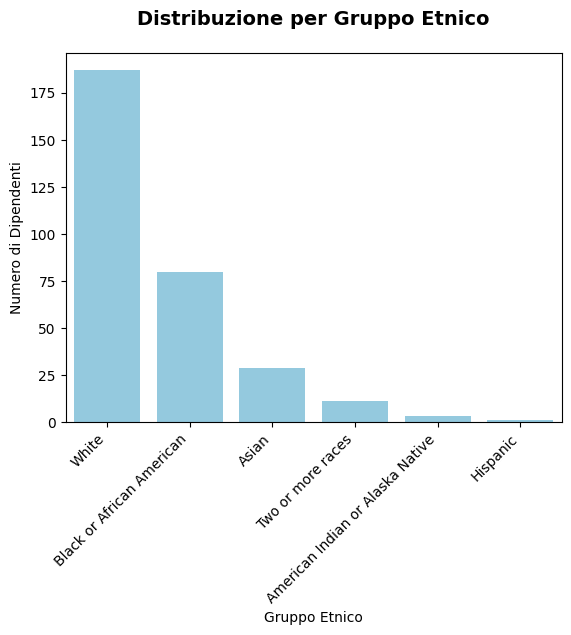

In [12]:
sns.barplot(race_dist, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuzione per Gruppo Etnico', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Gruppo Etnico')
plt.ylabel('Numero di Dipendenti')

plt.show()

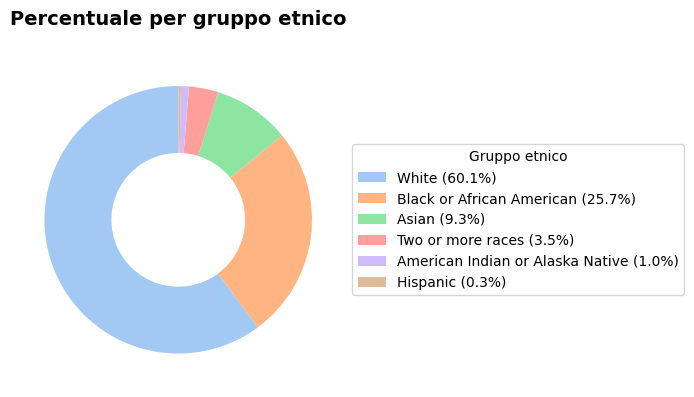

In [ ]:
colors = sns.color_palette('pastel')

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    race_perc,
    colors=colors,
    startangle=90,
    autopct='',
    wedgeprops=dict(width=0.5)
)

legend_labels = [f"{label} ({perc}%)" for label, perc in zip(race_perc.index, race_perc.round(1))]
    
ax.legend(wedges, legend_labels, title="Gruppo etnico", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentuale per gruppo etnico', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

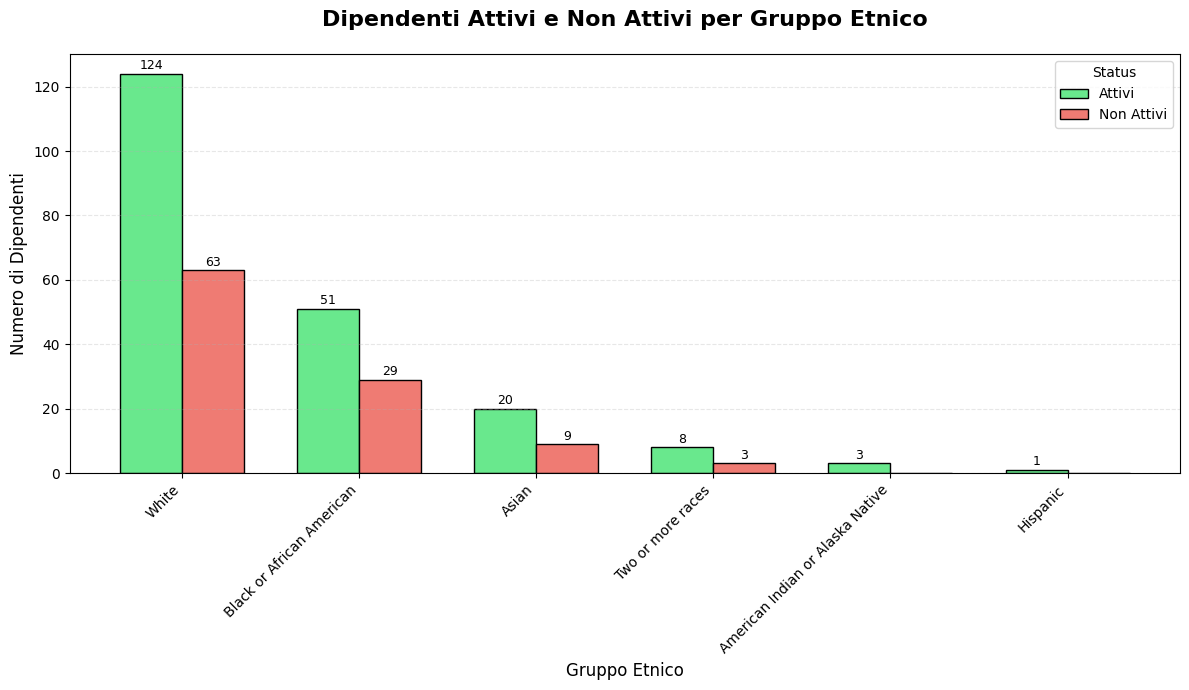

In [97]:
HR['Status'] = HR['EmploymentStatus'].apply(lambda x: 'Attivi' if x == 'Active' else 'Non Attivi')

grouped_data = HR.groupby(['RaceDesc', 'Status']).size().unstack(fill_value=0)

grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values('Total', ascending=False)
grouped_data = grouped_data.drop('Total', axis=1)

plt.figure(figsize=(12, 7))

colors = ["#69E88D", "#EF7B73"]  

x = range(len(grouped_data))
width = 0.35

bars_attivi = plt.bar([i - width/2 for i in x], grouped_data['Attivi'] if 'Attivi' in grouped_data.columns else [0]*len(grouped_data), 
                     width, label='Attivi', color=colors[0], edgecolor='black')
bars_non_attivi = plt.bar([i + width/2 for i in x], grouped_data['Non Attivi'] if 'Non Attivi' in grouped_data.columns else [0]*len(grouped_data), 
                         width, label='Non Attivi', color=colors[1], edgecolor='black')

plt.title('Dipendenti Attivi e Non Attivi per Gruppo Etnico', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gruppo Etnico', fontsize=12)
plt.ylabel('Numero di Dipendenti', fontsize=12)
plt.xticks(x, grouped_data.index, rotation=45, ha='right')
plt.legend(title='Status')
plt.grid(axis='y', alpha=0.3, linestyle='--')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

add_labels(bars_attivi)
add_labels(bars_non_attivi)

plt.tight_layout()
plt.show()

### 3. Quali sono le migliori fonti di reclutamento se si vuole garantire un'organizzazione diversificata?

In [54]:
print("DISTRIBUZIONE RAZZIALE PER FONTE DI RECLUTAMENTO\n")

race_by_source = pd.crosstab(
    HR['RecruitmentSource'], 
    HR['RaceDesc'],
    margins=True,
    margins_name='Totale'
)

print("Conteggi assoluti:")
print(race_by_source)

DISTRIBUZIONE RAZZIALE PER FONTE DI RECLUTAMENTO

Conteggi assoluti:
RaceDesc                 American Indian or Alaska Native  Asian  \
RecruitmentSource                                                  
CareerBuilder                                           0      2   
Diversity Job Fair                                      0      0   
Employee Referral                                       0      1   
Google Search                                           1      7   
Indeed                                                  1     10   
LinkedIn                                                1      8   
On-line Web application                                 0      0   
Other                                                   0      0   
Website                                                 0      1   
Totale                                                  3     29   

RaceDesc                 Black or African American  Hispanic  \
RecruitmentSource                                 

In [49]:
race_pct_by_source = pd.crosstab(
    HR['RecruitmentSource'], 
    HR['RaceDesc'],
    normalize='index'
) * 100

print("Percentuali per fonte di reclutamento:")
print(race_pct_by_source.round(1))

Percentuali per fonte di reclutamento:
RaceDesc                 American Indian or Alaska Native  Asian  \
RecruitmentSource                                                  
CareerBuilder                                         0.0    8.7   
Diversity Job Fair                                    0.0    0.0   
Employee Referral                                     0.0    3.2   
Google Search                                         2.0   14.3   
Indeed                                                1.1   11.5   
LinkedIn                                              1.3   10.5   
On-line Web application                               0.0    0.0   
Other                                                 0.0    0.0   
Website                                               0.0    7.7   

RaceDesc                 Black or African American  Hispanic  \
RecruitmentSource                                              
CareerBuilder                                 21.7       0.0   
Diversity Job Fair  

In [53]:
print("INDICE DI DIVERSITà PER FONTE\n")

def calculate_diversity_index(row):
    proportions = row / row.sum()
    return 1 - sum(p**2 for p in proportions)

diversity_index = race_pct_by_source.apply(calculate_diversity_index, axis=1).sort_values(ascending=False)

print("Indice di diversità per fonte (più alto = più diversificato):")
for source, index in diversity_index.items():
    print(f"{source}: {index:.3f}")

INDICE DI DIVERSITà PER FONTE

Indice di diversità per fonte (più alto = più diversificato):
Website: 0.604
Indeed: 0.561
LinkedIn: 0.559
CareerBuilder: 0.461
Google Search: 0.461
Employee Referral: 0.323
Diversity Job Fair: 0.000
On-line Web application: 0.000
Other: 0.000


In [57]:
print("TOP FONTI PER DIVERSITÀ\n")

top_sources = diversity_index.head(3)
print("Le 3 fonti con maggiore diversità:")
for source, index in top_sources.items():
    print(f"🏆 {source}: {index:.3f}")

TOP FONTI PER DIVERSITÀ

Le 3 fonti con maggiore diversità:
🏆 Website: 0.604
🏆 Indeed: 0.561
🏆 LinkedIn: 0.559


In [58]:
print("FONTI MIGLIORI PER GRUPPI SPECIFICI\n")

for race in HR['RaceDesc'].unique():
    if race != 'Totale':
        race_data = race_pct_by_source[race].sort_values(ascending=False)
        top_source = race_data.index[0]
        top_pct = race_data.iloc[0]
        print(f"Per il gruppo '{race}':")
        print(f"  Migliore fonte: {top_source} ({top_pct:.1f}%)")
        
        # Mostra anche la seconda migliore
        if len(race_data) > 1:
            second_source = race_data.index[1]
            second_pct = race_data.iloc[1]
            print(f"  Seconda migliore: {second_source} ({second_pct:.1f}%)")
        print()

FONTI MIGLIORI PER GRUPPI SPECIFICI

Per il gruppo 'White':
  Migliore fonte: Other (100.0%)
  Seconda migliore: On-line Web application (100.0%)

Per il gruppo 'Black or African American':
  Migliore fonte: Diversity Job Fair (100.0%)
  Seconda migliore: Website (30.8%)

Per il gruppo 'Two or more races':
  Migliore fonte: Website (7.7%)
  Seconda migliore: LinkedIn (5.3%)

Per il gruppo 'Asian':
  Migliore fonte: Google Search (14.3%)
  Seconda migliore: Indeed (11.5%)

Per il gruppo 'American Indian or Alaska Native':
  Migliore fonte: Google Search (2.0%)
  Seconda migliore: LinkedIn (1.3%)

Per il gruppo 'Hispanic':
  Migliore fonte: Indeed (1.1%)
  Seconda migliore: CareerBuilder (0.0%)



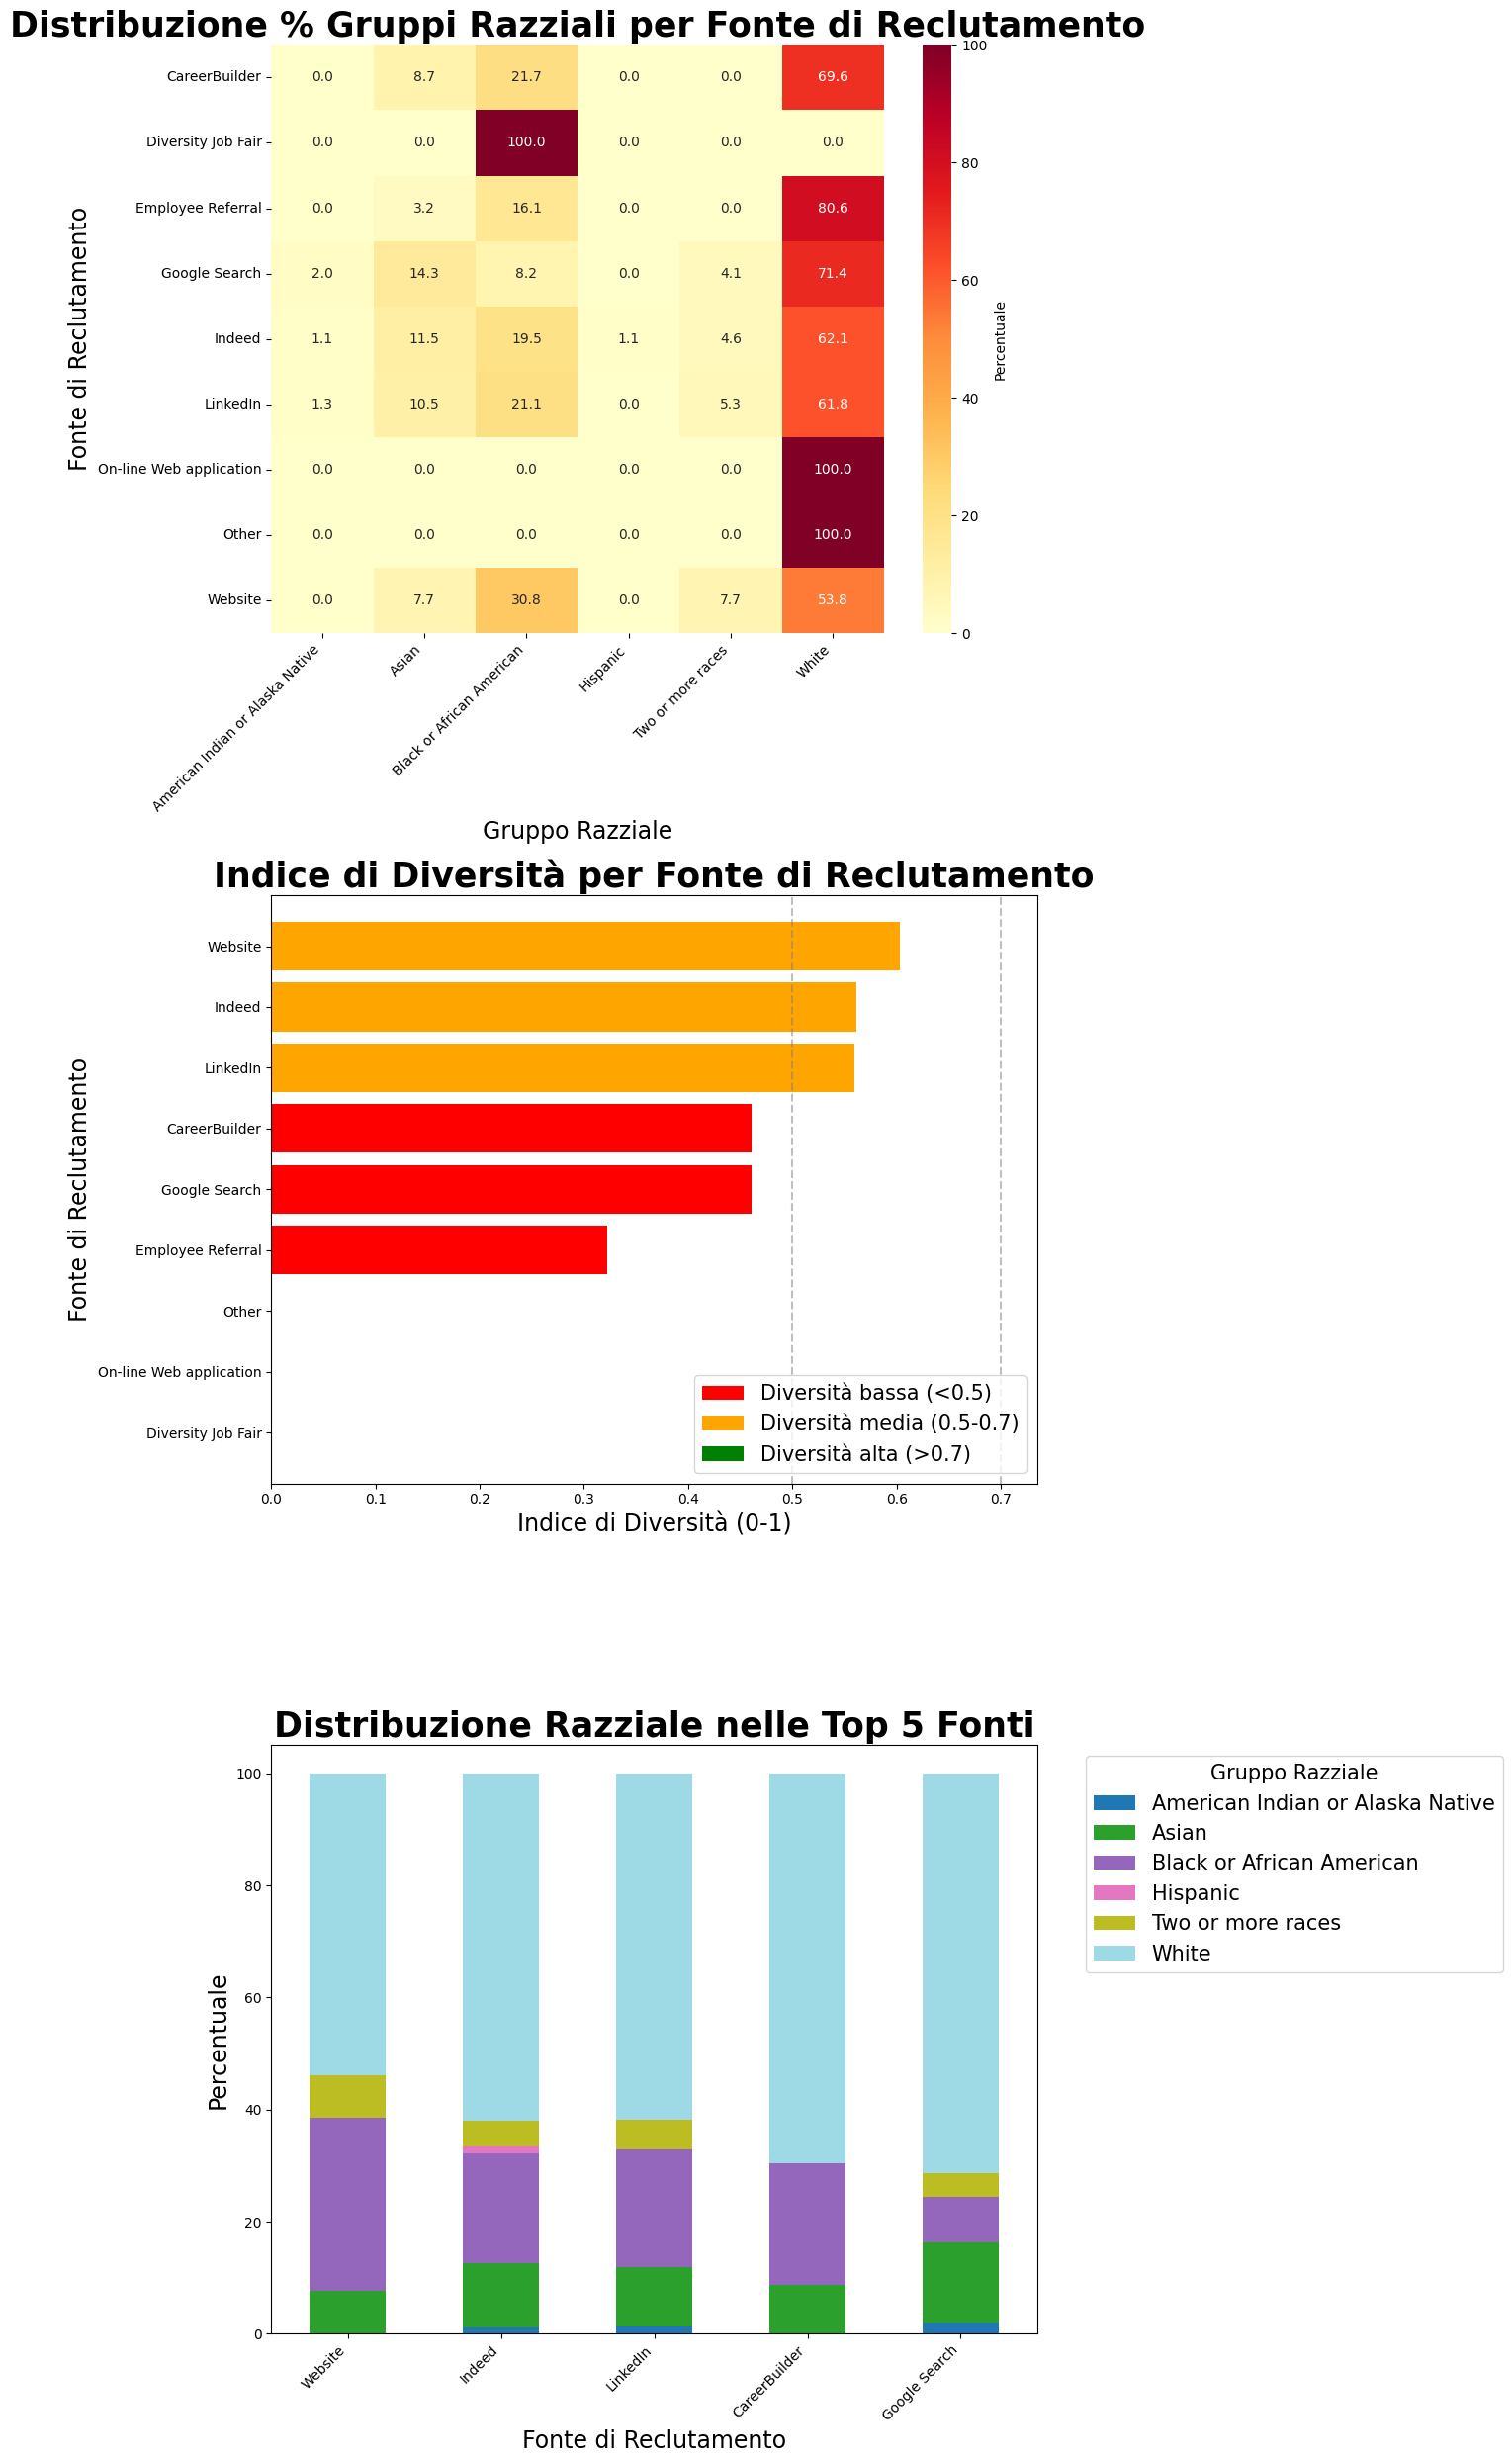

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 25))

sns.heatmap(race_pct_by_source, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[0], cbar_kws={'label': 'Percentuale'})
axes[0].set_title('Distribuzione % Gruppi Razziali per Fonte di Reclutamento', 
                    fontsize=25, fontweight='bold')
axes[0].set_xlabel('Gruppo Razziale', fontsize=17)
axes[0].set_ylabel('Fonte di Reclutamento', fontsize=17)
axes[0].set_xticklabels(race_pct_by_source.columns, rotation=45, ha='right')

diversity_df = pd.DataFrame({
    'Fonte': diversity_index.index,
    'Indice_Diversità': diversity_index.values
}).sort_values('Indice_Diversità', ascending=True)

colors = ['green' if x > 0.7 else 'orange' if x > 0.5 else 'red' 
          for x in diversity_df['Indice_Diversità']]

axes[1].barh(diversity_df['Fonte'], diversity_df['Indice_Diversità'], color=colors)
axes[1].set_title('Indice di Diversità per Fonte di Reclutamento', 
                    fontsize=25, fontweight='bold')
axes[1].set_xlabel('Indice di Diversità (0-1)', fontsize=17)
axes[1].set_ylabel('Fonte di Reclutamento', fontsize=17)
axes[1].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Soglia media')
axes[1].axvline(x=0.7, color='gray', linestyle='--', alpha=0.5)

legend_elements = [
    Patch(facecolor='red', label='Diversità bassa (<0.5)'),
    Patch(facecolor='orange', label='Diversità media (0.5-0.7)'),
    Patch(facecolor='green', label='Diversità alta (>0.7)')
]

axes[1].legend(handles=legend_elements, loc='lower right', fontsize=15)

top_5_sources = diversity_index.head(5).index
top_5_data = race_pct_by_source.loc[top_5_sources]

top_5_data.plot(kind='bar', stacked=True, ax=axes[2], colormap='tab20')
axes[2].set_title('Distribuzione Razziale nelle Top 5 Fonti', 
                    fontsize=25, fontweight='bold')
axes[2].set_xlabel('Fonte di Reclutamento', fontsize=17)
axes[2].set_ylabel('Percentuale', fontsize=17)
axes[2].legend(title='Gruppo Razziale', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15,  title_fontsize=15)
axes[2].set_xticklabels(top_5_sources, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [91]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("TEST P-value")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ RISULTATO: Esiste una relazione significativa tra fonte di reclutamento e diversità razziale (p < 0.05)")
    print("   La scelta della fonte di reclutamento influenza la composizione razziale")
else:
    print("❌ RISULTATO: Non esiste una relazione significativa tra fonte di reclutamento e diversità razziale (p >= 0.05)")
    print("   La composizione razziale non dipende significativamente dalla fonte di reclutamento")

TEST P-value
P-value: 0.0000
✅ RISULTATO: Esiste una relazione significativa tra fonte di reclutamento e diversità razziale (p < 0.05)
   La scelta della fonte di reclutamento influenza la composizione razziale


In [86]:
best_sources = diversity_index[diversity_index > diversity_index.median()].index.tolist()
worst_sources = diversity_index[diversity_index <= diversity_index.median()].index.tolist()

print("✅ FONTI DA PRIORITIZZARE (alta diversità):")
for source in best_sources:
    print(f"   • {source} (indice diversità: {diversity_index[source]:.3f})")

print("\n⚠️ FONTI DA INTEGRARE/MIGLIORARE (bassa diversità):")
for source in worst_sources:
    print(f"   • {source} (indice diversità: {diversity_index[source]:.3f})")

✅ FONTI DA PRIORITIZZARE (alta diversità):
   • Website (indice diversità: 0.604)
   • Indeed (indice diversità: 0.561)
   • LinkedIn (indice diversità: 0.559)
   • CareerBuilder (indice diversità: 0.461)

⚠️ FONTI DA INTEGRARE/MIGLIORARE (bassa diversità):
   • Google Search (indice diversità: 0.461)
   • Employee Referral (indice diversità: 0.323)
   • Diversity Job Fair (indice diversità: 0.000)
   • On-line Web application (indice diversità: 0.000)
   • Other (indice diversità: 0.000)


### 4. Ci sono aree dell'azienda in cui la retribuzione non è equa?

In [5]:
print("ANALISI EQUITÀ RETRIBUTIVA - HR DATASET")
HR.columns = HR.columns.str.strip()

print(f"\n📊 Dataset caricato: {HR.shape[0]} dipendenti, {HR.shape[1]} colonne")
print(f"📊 Dipartimenti presenti: {HR['Department'].nunique()}")
print(f"📊 Posizioni lavorative: {HR['Position'].nunique()}")
print(f"📊 Distribuzione genere: {HR['Sex'].value_counts().to_dict()}")

ANALISI EQUITÀ RETRIBUTIVA - HR DATASET

📊 Dataset caricato: 311 dipendenti, 36 colonne
📊 Dipartimenti presenti: 6
📊 Posizioni lavorative: 32
📊 Distribuzione genere: {'F': 176, 'M ': 135}


In [7]:
HR['Sex'].unique()

array(['M ', 'F'], dtype=object)

In [9]:
print("2. ANALISI GENERALE - STIPENDIO MEDIO PER GENERE")

salary_by_gender = HR.groupby('Sex')['Salary'].agg(['mean', 'count', 'std']).round(0)
print("\n📊 Statistiche stipendio per genere:")
print(salary_by_gender)

male_salary = salary_by_gender.loc['M ', 'mean']
female_salary = salary_by_gender.loc['F', 'mean']
gap_percent = ((male_salary - female_salary) / female_salary) * 100

print(f"\n💰 Gender Pay Gap: ${male_salary - female_salary:,.0f} ({gap_percent:.1f}%)")
print(f"   Gli uomini guadagnano in media {gap_percent:.1f}% in più delle donne")


2. ANALISI GENERALE - STIPENDIO MEDIO PER GENERE

📊 Statistiche stipendio per genere:
        mean  count      std
Sex                         
F    67787.0    176  25806.0
M    70629.0    135  24285.0

💰 Gender Pay Gap: $2,842 (4.2%)
   Gli uomini guadagnano in media 4.2% in più delle donne


In [ ]:
male_salaries = HR[HR['Sex'] == 'M ']['Salary'].dropna()
female_salaries = HR[HR['Sex'] == 'F']['Salary'].dropna()
t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries)

print(f"\n📈 Test T: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("   ✅ Differenza statisticamente SIGNIFICATIVA (p < 0.05)")
else:
    print("   ❌ Differenza NON statisticamente significativa (p >= 0.05)")


📈 Test T di Student: p-value = 0.3241
   ❌ Differenza NON statisticamente significativa (p >= 0.05)


In [13]:
print("3. ANALISI PER DIPARTIMENTO")

dept_salary = HR.groupby(['Department', 'Sex'])['Salary'].agg(['mean', 'count']).round(0).reset_index()
dept_salary = dept_salary.pivot(index='Department', columns='Sex', values='mean').reset_index()
dept_salary['Differenza'] = (dept_salary['M '] - dept_salary['F']).round(0)
dept_salary['Differenza_%'] = ((dept_salary['M '] - dept_salary['F']) / dept_salary['F'] * 100).round(1)

dept_counts = HR.groupby('Department').size().reset_index(name='Totale_Dipendenti')
dept_salary = dept_salary.merge(dept_counts, on='Department')

print("\n📊 Stipendio medio per dipartimento e genere:")
print(dept_salary.to_string(index=False))

3. ANALISI PER DIPARTIMENTO

📊 Stipendio medio per dipartimento e genere:
          Department        F      M   Differenza  Differenza_%  Totale_Dipendenti
       Admin Offices  70926.0 73523.0      2597.0           3.7                  9
    Executive Office 250000.0     NaN         NaN           NaN                  1
               IT/IS  94593.0 99007.0      4414.0           4.7                 50
   Production         59620.0 60459.0       839.0           1.4                209
               Sales  72017.0 66291.0     -5726.0          -8.0                 31
Software Engineering  96906.0 92689.0     -4217.0          -4.4                 11


In [14]:
critical_depts = dept_salary[ 
    (dept_salary['Differenza'].abs() > 5000) | 
    (dept_salary['Differenza_%'].abs() > 10)
].sort_values('Differenza', ascending=False)

print("\n⚠️ DIPARTIMENTI CRITICI (differenza > $5,000 o > 10%):")
if len(critical_depts) > 0:
    for _, row in critical_depts.iterrows():
        print(f"   • {row['Department']}: +${row['Differenza']:,.0f} ({row['Differenza_%']:.1f}%) a favore degli uomini")
else:
    print("   Nessun dipartimento critico identificato")



⚠️ DIPARTIMENTI CRITICI (differenza > $5,000 o > 10%):
   • Sales: +$-5,726 (-8.0%) a favore degli uomini


In [16]:
print("4. ANALISI PER POSIZIONE LAVORATIVA")

position_gender_counts = HR.groupby(['Position', 'Sex']).size().unstack(fill_value=0)
valid_positions = position_gender_counts[
    (position_gender_counts['M '] >= 2) & 
    (position_gender_counts['F'] >= 2)
].index

position_salary = HR[HR['Position'].isin(valid_positions)].groupby(['Position', 'Sex'])['Salary'].mean().round(0).reset_index()
position_salary = position_salary.pivot(index='Position', columns='Sex', values='Salary').reset_index()
position_salary['Differenza'] = (position_salary['M '] - position_salary['F']).round(0)
position_salary['Differenza_%'] = ((position_salary['M '] - position_salary['F']) / position_salary['F'] * 100).round(1)

position_salary = position_salary.sort_values('Differenza', ascending=False)

print(f"\n📊 Stipendio medio per posizione (con almeno 2 uomini e 2 donne):")
print(position_salary[['Position', 'F', 'M ', 'Differenza', 'Differenza_%']].head(10).to_string(index=False))

4. ANALISI PER POSIZIONE LAVORATIVA

📊 Stipendio medio per posizione (con almeno 2 uomini e 2 donne):
                Position       F      M   Differenza  Differenza_%
        Network Engineer 51674.0 68225.0     16551.0          32.0
      Production Manager 72947.0 77055.0      4108.0           5.6
      Area Sales Manager 63794.0 65844.0      2050.0           3.2
              IT Support 63188.0 64512.0      1324.0           2.1
       Software Engineer 96906.0 96439.0      -467.0          -0.5
 Production Technician I 56082.0 54667.0     -1415.0          -2.5
Production Technician II 65398.0 63957.0     -1441.0          -2.2
            Data Analyst 90910.0 89200.0     -1710.0          -1.9
    Sr. Network Engineer 96127.0 91033.0     -5094.0          -5.3


In [17]:
critical_positions = position_salary[position_salary['Differenza'].abs() > 5000].head(10)

print("\n⚠️ POSIZIONI CON MAGGIORI DISPARITÀ (> $5,000):")
for _, row in critical_positions.iterrows():
    direction = "uomini" if row['Differenza'] > 0 else "donne"
    print(f"   • {row['Position']}: ${abs(row['Differenza']):,.0f} ({abs(row['Differenza_%']):.1f}%) a favore dei {direction}")


⚠️ POSIZIONI CON MAGGIORI DISPARITÀ (> $5,000):
   • Network Engineer: $16,551 (32.0%) a favore dei uomini
   • Sr. Network Engineer: $5,094 (5.3%) a favore dei donne


In [18]:
print("5. ANALISI PER ANZIANITÀ")

HR['DateofHire'] = pd.to_datetime(HR['DateofHire'])
HR['DateofTermination'] = pd.to_datetime(HR['DateofTermination'], errors='coerce')

end_date = pd.Timestamp.now()
HR['YearsService'] = HR.apply(
    lambda row: (row['DateofTermination'] - row['DateofHire']).days / 365.25 
    if pd.notna(row['DateofTermination']) 
    else (end_date - row['DateofHire']).days / 365.25,
    axis=1
)
HR['YearsService'] = HR['YearsService'].round(1)

HR['SeniorityGroup'] = pd.cut(
    HR['YearsService'], 
    bins=[0, 2, 5, 10, 20, 50], 
    labels=['<2 anni', '2-5 anni', '5-10 anni', '10-20 anni', '20+ anni']
)

seniority_salary = HR.groupby(['SeniorityGroup', 'Sex'])['Salary'].mean().round(0).reset_index()
seniority_salary = seniority_salary.pivot(index='SeniorityGroup', columns='Sex', values='Salary').reset_index()
seniority_salary['Differenza'] = (seniority_salary['M '] - seniority_salary['F']).round(0)
seniority_salary['Differenza_%'] = ((seniority_salary['M '] - seniority_salary['F']) / seniority_salary['F'] * 100).round(1)

print("\n📊 Stipendio medio per anzianità e genere:")
print(seniority_salary.to_string(index=False))

5. ANALISI PER ANZIANITÀ

📊 Stipendio medio per anzianità e genere:
SeniorityGroup       F      M   Differenza  Differenza_%
       <2 anni 66968.0 80529.0     13561.0          20.2
      2-5 anni 62797.0 66869.0      4072.0           6.5
     5-10 anni 67841.0 71155.0      3314.0           4.9
    10-20 anni 69266.0 69954.0       688.0           1.0
      20+ anni     NaN 64397.0         NaN           NaN


C:\Users\tosol\AppData\Local\Temp\ipykernel_19920\754208364.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seniority_salary = HR.groupby(['SeniorityGroup', 'Sex'])['Salary'].mean().round(0).reset_index()


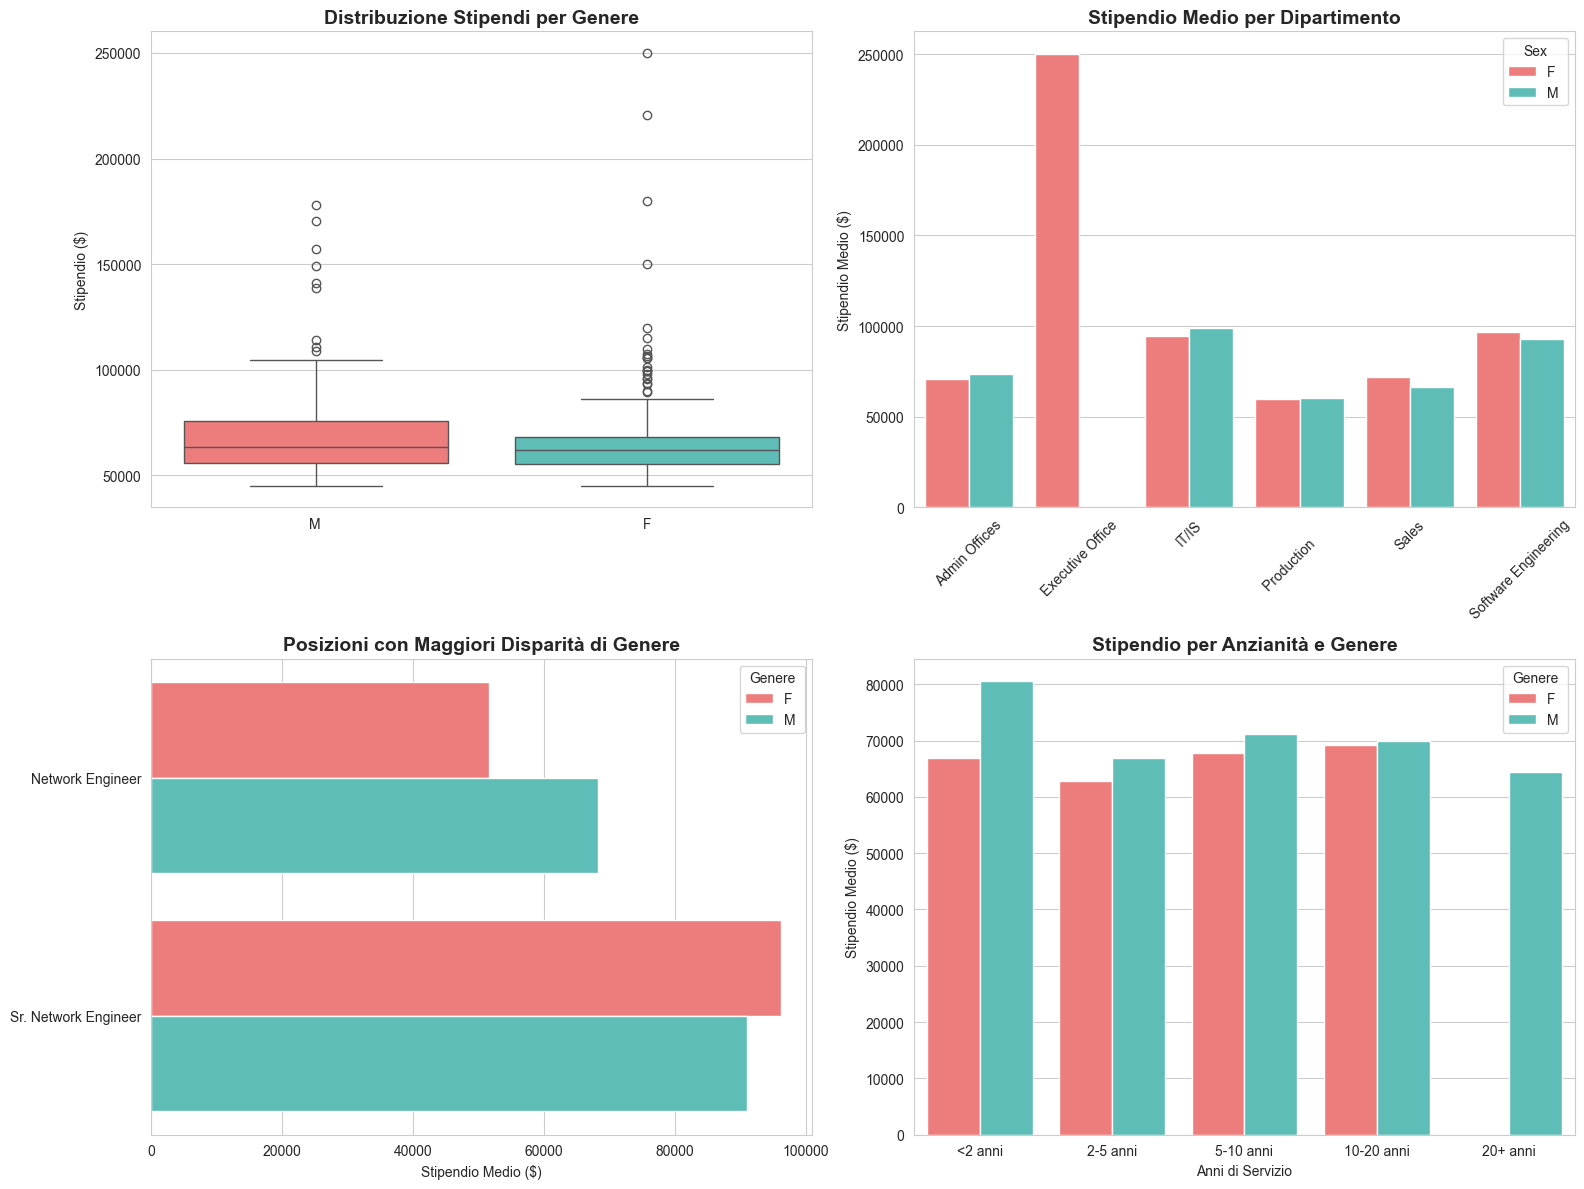

In [20]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(data=HR, x='Sex', y='Salary', hue='Sex', ax=axes[0, 0], palette=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Distribuzione Stipendi per Genere', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Stipendio ($)')

dept_plot_data = HR.groupby(['Department', 'Sex'])['Salary'].mean().reset_index()
sns.barplot(data=dept_plot_data, x='Department', y='Salary', hue='Sex', ax=axes[0, 1], 
            palette=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Stipendio Medio per Dipartimento', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Stipendio Medio ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

top_disparities = critical_positions.head(8).copy()
top_disparities_melted = pd.melt(
    top_disparities, 
    id_vars=['Position'], 
    value_vars=['F', 'M '],
    var_name='Genere', 
    value_name='Salary'
)
sns.barplot(data=top_disparities_melted, x='Salary', y='Position', hue='Genere', ax=axes[1, 0],
            palette=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Posizioni con Maggiori Disparità di Genere', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Stipendio Medio ($)')
axes[1, 0].set_ylabel('')

seniority_plot_data = seniority_salary.melt(
    id_vars=['SeniorityGroup'], 
    value_vars=['F', 'M '],
    var_name='Genere', 
    value_name='Salary'
)
sns.barplot(data=seniority_plot_data, x='SeniorityGroup', y='Salary', hue='Genere', ax=axes[1, 1],
            palette=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_title('Stipendio per Anzianità e Genere', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Anni di Servizio')
axes[1, 1].set_ylabel('Stipendio Medio ($)')

plt.tight_layout()
plt.savefig('analisi_equita_retributiva.png', dpi=100, bbox_inches='tight')
plt.show()


In [23]:
print(f"""
📊 **SINTESI DEI RISULTATI**

1. **GENDER PAY GAP AZIENDALE:**
   • Stipendio medio uomini: ${male_salary:,.0f}
   • Stipendio medio donne: ${female_salary:,.0f}
   • Differenza: ${male_salary - female_salary:,.0f} ({gap_percent:.1f}%)
   • Significatività statistica: {"✅ SÌ" if p_value < 0.05 else "❌ NO"}

2. **DIPARTIMENTI CRITICI:**
""")

if len(critical_depts) > 0:
    for _, row in critical_depts.iterrows():
        print(f"   • {row['Department']}: +${row['Differenza']:,.0f} ({row['Differenza_%']:.1f}%)")
else:
    print("   • Nessun dipartimento critico")

print(f"""
3. **POSIZIONI CON MAGGIORI DISPARITÀ:**
""")

if len(critical_positions) > 0:
    for _, row in critical_positions.head(5).iterrows():
        print(f"   • {row['Position']}: ${row['M ']:,.0f} vs ${row['F']:,.0f} (diff: ${row['Differenza']:,.0f})")
else:
    print("   • Nessuna posizione critica")



📊 **SINTESI DEI RISULTATI**

1. **GENDER PAY GAP AZIENDALE:**
   • Stipendio medio uomini: $70,629
   • Stipendio medio donne: $67,787
   • Differenza: $2,842 (4.2%)
   • Significatività statistica: ❌ NO

2. **DIPARTIMENTI CRITICI:**

   • Sales: +$-5,726 (-8.0%)

3. **POSIZIONI CON MAGGIORI DISPARITÀ:**

   • Network Engineer: $68,225 vs $51,674 (diff: $16,551)
   • Sr. Network Engineer: $91,033 vs $96,127 (diff: $-5,094)
